# Data Preprocessing

## Data Cleaning

In [12]:
import pandas as pd

In [24]:
player_per_game = pd.read_csv("data/PlayerPerGame.csv")
player_per_game = player_per_game[player_per_game['season'] > 1975]
player_per_game = player_per_game[player_per_game['experience'] == 1]
duplicated_players_mask = player_per_game.duplicated(subset='player', keep=False)
player_per_game = player_per_game[~duplicated_players_mask]
columns_to_drop = ['birth_year', 'seas_id', 'lg', 'g', 'gs']
player_per_game = player_per_game.drop(columns=columns_to_drop)

In [25]:
player_totals = pd.read_csv("data/PlayerTotals.csv")
player_totals = player_totals[player_totals['season'] > 1975]
player_totals = player_totals[player_totals['experience'] == 1]
duplicated_players_mask = player_totals.duplicated(subset='player', keep=False)
player_totals = player_totals[~duplicated_players_mask]
columns_to_drop = ['birth_year', 'seas_id', 'lg', 'g', 'gs', 'ft_percent', 'player', 'age', 'experience', 'season', 'tm', 'pos', 'fg_percent', 'fg_percent', 'x3p_percent', 'x2p_percent', 'e_fg_percent']
player_totals = player_totals.drop(columns=columns_to_drop)

In [26]:
player_stats = pd.merge(player_per_game, player_totals, on='player_id', suffixes=('_df1', '_df2'))

print(player_stats)

      season  player_id          player pos   age  experience   tm  \
0       2024       5109    Adam Flagler  SG  24.0           1  OKC   
1       2024       5110    Adama Sanogo  PF  21.0           1  CHI   
2       2024       5111      Alex Fudge  SF  20.0           1  LAL   
3       2024       5112    Amari Bailey  PG  19.0           1  CHO   
4       2024       5113   Amen Thompson  SF  21.0           1  HOU   
...      ...        ...             ...  ..   ...         ...  ...   
3296    1976       1687     Tom Boswell  PF  22.0           1  BOS   
3297    1976       1688       Tom Kropp  SG  22.0           1  WSB   
3298    1976       1689    Tom McMillen   C  23.0           1  BUF   
3299    1976       1690  Wilbur Holland  SG  24.0           1  ATL   
3300    1976       1691   World B. Free  SG  22.0           1  PHI   

      mp_per_game  fg_per_game  fga_per_game  ...  fta   orb    drb    trb  \
0             6.0          0.0           3.0  ...    0   0.0    0.0    0.0   
1  

In [27]:
team_summary = pd.read_csv("data/TeamSummaries.csv")
team_summary = team_summary[team_summary['season'] > 1975]
selected_columns = ['abbreviation', 'season', 'playoffs', 'w', 'l']
team_summary = team_summary.loc[:, selected_columns]
team_summary.rename(columns={'abbreviation': 'tm'}, inplace=True)
print(team_summary)

       tm  season  playoffs     w     l
0     ATL    2024     False  26.0  33.0
1     BOS    2024     False  46.0  12.0
2     BRK    2024     False  23.0  36.0
3     CHI    2024     False  28.0  31.0
4     CHO    2024     False  15.0  44.0
...   ...     ...       ...   ...   ...
1392  UTS    1976     False   4.0  12.0
1393  VIR    1976     False  15.0  68.0
1394  WSB    1976      True  48.0  34.0
1395  NaN    1976     False   NaN   NaN
1396  NaN    1976     False   NaN   NaN

[1397 rows x 5 columns]


In [28]:
data = player_stats.merge(team_summary, on=['tm', 'season'], how='left')

#For simplicity, all players with missing stats are dropped
data = data.dropna(axis=0, inplace=False)

columns_to_drop = ['pos', 'age', 'experience', 'tm']
data = data.drop(columns=columns_to_drop)
data['playoffs'] = data['playoffs'].replace({True: 1, False: 0})

player_stats = data[data['player_id'] == 5201]
print(player_stats)
print(data)

    season  player_id             player  mp_per_game  fg_per_game  \
88    2024       5201  Victor Wembanyama         28.7          7.6   

    fga_per_game  fg_percent  x3p_per_game  x3pa_per_game  x3p_percent  ...  \
88          16.2       0.467           1.6            5.0        0.327  ...   

      trb  ast   stl    blk    tov   pf   pts  playoffs     w     l  
88  551.0  183  71.0  180.0  185.0  117  1119         0  12.0  48.0  

[1 rows x 47 columns]
      season  player_id             player  mp_per_game  fg_per_game  \
2       2024       5111         Alex Fudge          3.5          0.3   
3       2024       5112       Amari Bailey          5.0          0.7   
4       2024       5113      Amen Thompson         19.5          3.1   
5       2024       5114  Andre Jackson Jr.         10.8          1.0   
6       2024       5115      Anthony Black         18.6          1.8   
...      ...        ...                ...          ...          ...   
3284    1976       1674        Me

## Data Visualization

Here, we will plot a few important stats (points, ppg, assists, etc) for a single season (2022 - 2023). We should include points showing which players made all rookie team to begin looking for trends

In this first plot, we see generally that high schoring players tend to make the All-Rookie team

In [29]:
import matplotlib.pyplot as plt

In [30]:
data_copy = data.copy()
data_copy = data_copy[data_copy['season'] == 2022]

teams = pd.read_csv("data/EndofSeasonTeams.csv")
teams = teams[teams['season'] == 2022]
teams = teams[teams['type'] == 'All-Rookie']
columns_to_drop = ['position', 'seas_id', 'player_id', 'birth_year', 'tm', 'age']
teams = teams.drop(columns=columns_to_drop)
print(teams)

    season   lg        type number_tm           player
25    2022  NBA  All-Rookie       1st  Cade Cunningham
26    2022  NBA  All-Rookie       1st      Evan Mobley
27    2022  NBA  All-Rookie       1st     Franz Wagner
28    2022  NBA  All-Rookie       1st      Jalen Green
29    2022  NBA  All-Rookie       1st   Scottie Barnes
30    2022  NBA  All-Rookie       2nd      Ayo Dosunmu
31    2022  NBA  All-Rookie       2nd     Bones Hyland
32    2022  NBA  All-Rookie       2nd     Chris Duarte
33    2022  NBA  All-Rookie       2nd    Herbert Jones
34    2022  NBA  All-Rookie       2nd      Josh Giddey


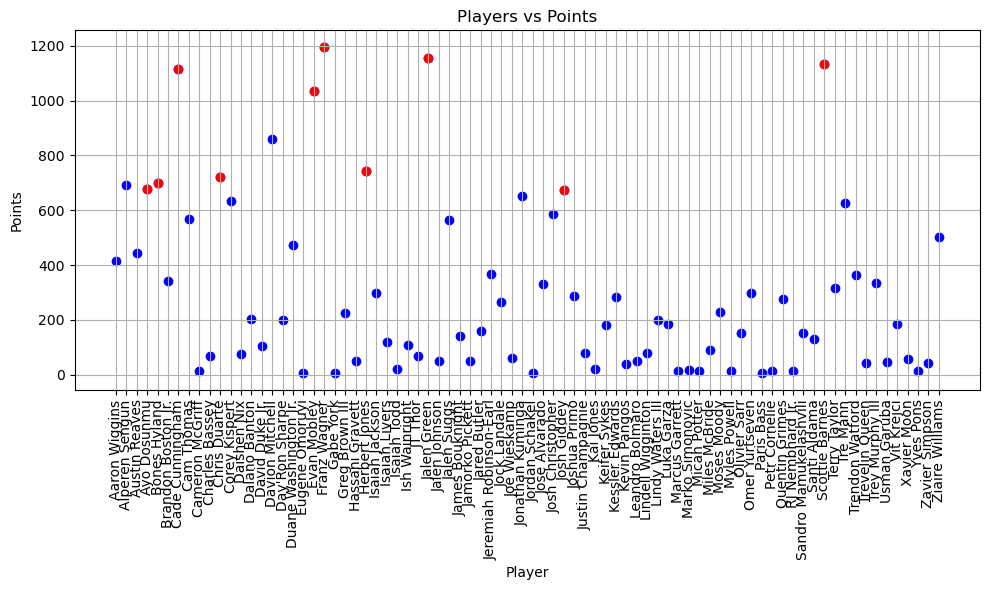

In [31]:
highlight_players = [
    'Cade Cunningham', 'Evan Mobley', 'Franz Wagner',
    'Jalen Green', 'Scottie Barnes', 'Ayo Dosunmu',
    'Bones Hyland', 'Chris Duarte', 'Herbert Jones',
    'Josh Giddey'
]


data_copy['highlight'] = data_copy['player'].isin(highlight_players)

plt.figure(figsize=(10, 6))
plt.scatter(data_copy['player'], data_copy['pts'], color='blue')

highlighted_players = data_copy[data_copy['highlight']]
plt.scatter(highlighted_players['player'], highlighted_players['pts'], color='red', label='Highlighted Players')

plt.title('Players vs Points')
plt.xlabel('Player')
plt.ylabel('Points')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
column_titles = data_copy.columns.tolist()
print(column_titles)


['season', 'player_id', 'player', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game', 'pts_per_game', 'mp', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'playoffs', 'w', 'l', 'highlight']


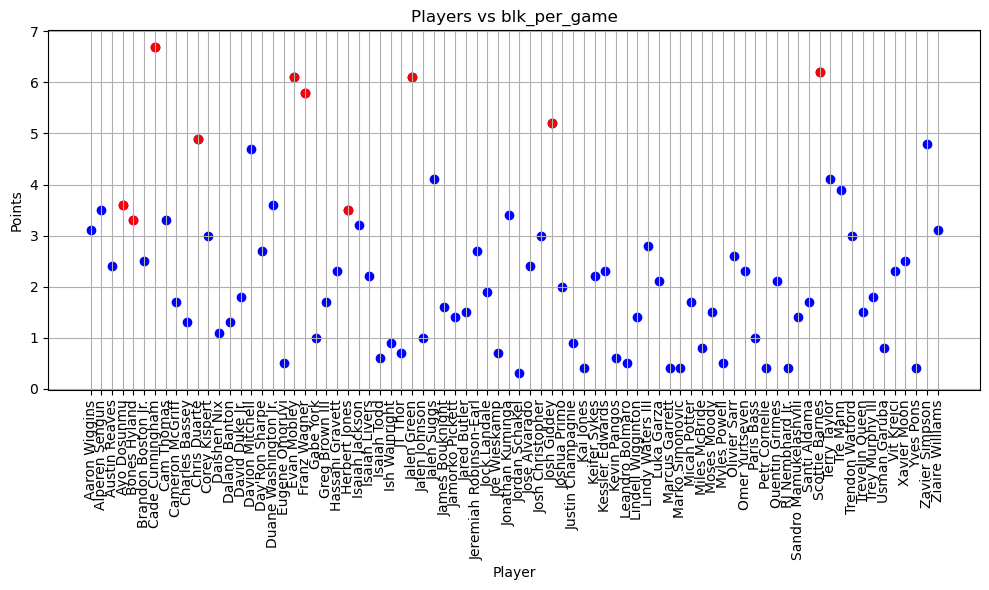

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(data_copy['player'], data_copy['fg_per_game'], color='blue')

highlighted_players = data_copy[data_copy['highlight']]
plt.scatter(highlighted_players['player'], highlighted_players['fg_per_game'], color='red', label='Highlighted Players')

plt.title('Players vs fg_per_game')
plt.xlabel('Player')
plt.ylabel('Points')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

It seems like the most important stats all involve points. If PCA doesnt work, we could manually look through graphs like the ones above and find important stats to use for our model

## Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

Need to check if this is implemented correctly

In [17]:
data_numbers = data.drop(columns=['player', 'player_id', 'season'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numbers)

print(scaled_data)

[[-1.42778595 -1.21233494 -1.08585741 ... -0.87033616 -0.28903992
  -1.14269195]
 [-1.25136085 -0.96851803 -0.85489507 ... -0.87033616 -1.68467379
   0.08202137]
 [ 0.45408173  0.49438344  0.29991659 ... -0.87033616 -0.90932164
  -0.68342446]
 ...
 [-0.78089393 -0.72470112 -0.71054362 ...  1.14898133  1.80441088
  -1.44887029]
 [-1.12198245 -0.78565535 -0.88376537 ...  1.14898133  0.17617137
   0.15856595]
 [ 1.77138909  3.42018639  3.56225954 ... -0.87033616 -1.68467379
   1.91909135]]


## PCA

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)
num_components = pca.n_components_
print(num_components)

12


Need to figure out why so many players are dropped during PCA. Most likely incomplete data

Need to check if this is implemented correctly

In [83]:
pca_data = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(num_components)])
data = pd.concat([data[['player', 'player_id', 'season']], pca_data], axis=1)
data = data.dropna(axis=0, inplace=False)
print(data)

                 player  player_id  season        PC1       PC2       PC3  \
2            Alex Fudge     5111.0  2024.0   2.620254 -2.083415 -1.146471   
3          Amari Bailey     5112.0  2024.0  -2.533524 -2.074057 -4.533215   
4         Amen Thompson     5113.0  2024.0  -0.436291 -0.046354 -2.385357   
5     Andre Jackson Jr.     5114.0  2024.0   5.051275 -2.163502 -0.919414   
6         Anthony Black     5115.0  2024.0  -3.044373  0.750945 -2.910759   
...                 ...        ...     ...        ...       ...       ...   
2340    Demetrius Calip     2646.0  1992.0  -3.820363 -0.561362  0.455226   
2344           Doug Lee     2650.0  1992.0   0.611517  1.332809  0.979870   
2345         Doug Smith     2651.0  1992.0  -2.529747  0.374007  0.180043   
2346       Eric Murdock     2653.0  1992.0  -4.362944 -2.061250  0.017915   
2347       Greg Anthony     2654.0  1992.0  11.674340  1.164614  2.692542   

           PC4       PC5       PC6       PC7       PC8       PC9      PC10 

# Method 1